In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Proyecto_Final/DataSetOriginal.csv')

In [3]:
#1. Manejo de Valores Nulos:
#    Identificar valores nulos en el dataset.
#    Decidir cómo manejar los valores nulos (eliminar filas, imputar valores, etc.).
print(df.isnull().sum())  # Muestra el número de valores nulos por columna

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


In [4]:
#2. Conversión de la Columna Date/Time:
#    Convertir la columna Date/Time a un formato de fecha y hora adecuado.
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%d %m %Y %H:%M")

In [5]:
#3. Manejo de Unidades de Potencia:
#    Convertir la columna Theoretical_Power_Curve (KWh) a kilovatios (kW) para que sea comparable con LV ActivePower (kW).
#    Dividir los valores de Theoretical_Power_Curve (KWh) por 10 (ya que son mediciones cada 10 minutos).
df['Theoretical_Power_Curve (kW)'] = df['Theoretical_Power_Curve (KWh)'] / 10
df = df.drop('Theoretical_Power_Curve (KWh)', axis=1) # Elimina la columna original

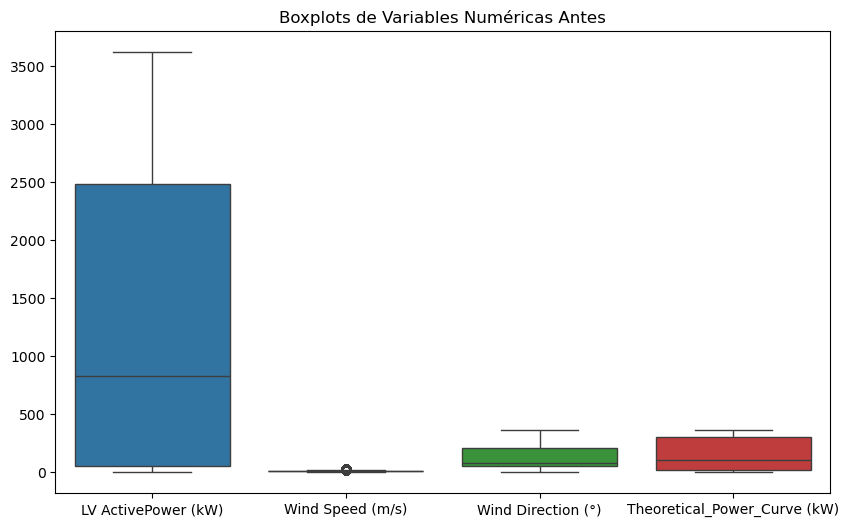

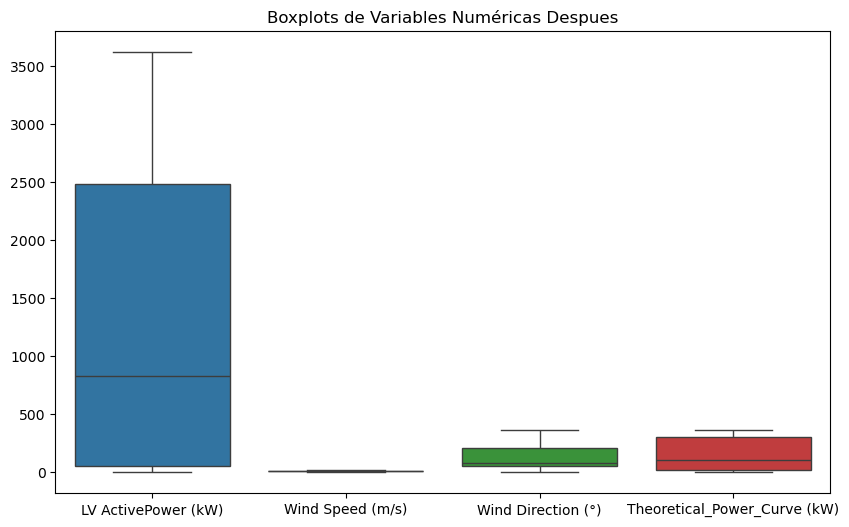

In [6]:
#4. Manejo de Valores Atípicos (Outliers):
#    Identificar valores atípicos en las columnas numéricas.
#    Decidir cómo manejar los valores atípicos (eliminarlos, transformarlos, etc.).
# detección de outliers usando boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (kW)']])
plt.title('Boxplots de Variables Numéricas Antes')
plt.show()

# Verifica si las columnas numéricas son de tipo int64
if df['LV ActivePower (kW)'].dtype == 'int64':
    # Convierte las columnas numéricas a float64
    cols_to_convert = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)','Theoretical_Power_Curve (kW)']
    for col in cols_to_convert:
        df[col] = df[col].astype(float)
        
# Función para detectar y manejar outliers usando el método IQR
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Reemplaza los outliers con los límites superior e inferior
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Aplica la función a las columnas numéricas
cols_to_handle = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)','Theoretical_Power_Curve (kW)']
for col in cols_to_handle:
    handle_outliers(df, col)
    
# Crea la columna Power_Difference
df['Power_Difference'] = df['LV ActivePower (kW)'] - df['Theoretical_Power_Curve (kW)']

# Maneja los outliers en Power_Difference
handle_outliers(df, 'Power_Difference')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (kW)']])
plt.title('Boxplots de Variables Numéricas Despues')
plt.show()

In [7]:
#6. Eliminación de Columnas Innecesarias (Opcional):
#    Eliminar columnas que no sean relevantes para el modelado.
# Ejemplo de eliminación de la columna 'Date/Time' si no se va a utilizar como característica
df = df.drop('Power_Difference', axis=1)

In [11]:
#7. Verifica los tipos de datos
print(df.dtypes)

# Convierte las columnas a float64 si es necesario
cols_to_convert = ['Wind Speed (m/s)', 'Wind Direction (°)', 'LV ActivePower (kW)']
for col in cols_to_convert:
    if df[col].dtype != 'float64':
        df[col] = df[col].astype('float64')

Date/Time                       datetime64[ns]
LV ActivePower (kW)                    float64
Wind Speed (m/s)                       float64
Wind Direction (°)                     float64
Theoretical_Power_Curve (kW)           float64
dtype: object


In [13]:
#8. Creación del Dataset Oficial:
#    Guardar el dataset limpio y preparado en un nuevo archivo CSV para su uso posterior.
df.to_csv('C:/Proyecto_Final/DataSetFinal.csv', index=False)